Pymaceutical exercise data analysis:
-By analysing the Tumor volume (mm3) variation with the different drugs during the 45 days, we can verify that the drug Capomulin caused a decrease of about 20% in the Tumor volume
-The spread of  Metastatic sites was also lower with the Capomulin drug over the 45 days
-The survival rate with treatment with drug Capomulin was roughly of 80%, whereas it ranged between 40-60% with the other treatments

Overall we can conclude that Capomulin was the drug that had better effects in terms of reducing the size of the volume of the tumors, reducing the spreading of metastatic sites and increasing the values of survival rates of mice.

In [1]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
# Take in all of raw_data and read it into pandas
clinical_trial=os.path.join('raw_data', 'clinicaltrial_data.csv')
mouse_drug_data=os.path.join('raw_data', 'mouse_drug_data.csv')
clinical_trial_df = pd.read_csv(clinical_trial)
mouse_drug_data_df = pd.read_csv(mouse_drug_data)
clinical_trial_df.head()
mouse_drug_data_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [3]:
#Merge data of both files and format
clinical_mouse_merge_df = pd.merge(clinical_trial_df, mouse_drug_data_df, on="Mouse ID", how="outer")
clinical_mouse_merge_df['Tumor Volume (mm3)'] = clinical_mouse_merge_df['Tumor Volume (mm3)'].map("{:.1f}".format)
#clinical_mouse_merge_df["Drug"].unique()
clinical_mouse_merge_df["Tumor Volume (mm3)"]= pd.to_numeric(clinical_mouse_merge_df["Tumor Volume (mm3)"])
clinical_mouse_merge_df["Timepoint"]= pd.to_numeric(clinical_mouse_merge_df["Timepoint"])
clinical_mouse_merge_df["Metastatic Sites"]= pd.to_numeric(clinical_mouse_merge_df["Metastatic Sites"])
clinical_mouse_merge_df.sort_values("Timepoint").head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1535,i635,0,45.0,0,Propriva
565,g791,0,45.0,0,Ramicane
1545,w746,0,45.0,0,Propriva
1547,r107,0,45.0,0,Propriva


In [99]:
#Tumor Response to Treatment, mean of the Tumor volume (mm3)
Drug_effect_mean= clinical_mouse_merge_df.groupby(["Drug","Timepoint"]).mean()
Drug_effect_mean_df=pd.DataFrame(Drug_effect_mean['Tumor Volume (mm3)'])
Drug_effect_mean_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.268000
          10                  43.080000
          15                  42.066667
          20                  40.717391

In [5]:
#Tumor Response to Treatment, stardard error of the mean of the Tumor volume (mm3)
Drug_effect_sem= clinical_mouse_merge_df.groupby(["Drug","Timepoint"]).sem()
Drug_effect_sem_df=pd.DataFrame(Drug_effect_sem['Tumor Volume (mm3)'])
Drug_effect_sem_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.449137
          10                   0.704036
          15                   0.837107
          20                   0.908820

In [6]:
#Create pivor table of the Tumor Response to Treatment, mean of the Tumor volume (mm3)
Drug_effect_tumor_mean_pivot_table=Drug_effect_mean_df.pivot_table('Tumor Volume (mm3)', ['Timepoint'], 'Drug')
Drug_effect_tumor_mean_pivot_table.columns

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

In [7]:
#Create pivor table of the Tumor Response to Treatment, stardard error of the mean of the Tumor volume (mm3) 
Drug_effect_tumor_sem_pivot_table=Drug_effect_sem_df.pivot_table('Tumor Volume (mm3)', ['Timepoint'], 'Drug')
Drug_effect_tumor_sem_pivot_table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.449137,0.164096,0.235533,0.266584,0.201272,0.216834,0.233172,0.485356,0.240175,0.189584
10,0.704036,0.234734,0.283339,0.356324,0.321307,0.400980,0.377399,0.719240,0.433280,0.263944
15,0.837107,0.334288,0.352805,0.577249,0.444669,0.612733,0.466272,0.770151,0.493940,0.367334
20,0.908820,0.356109,0.476416,0.725309,0.594510,0.839567,0.554597,0.787014,0.619751,0.533493


In [8]:
#Comparison analysis for ["Capomulin","Infubinol","Ketapril","Placebo" ]
#mean
Comp_mean_Drug_effect=Drug_effect_tumor_mean_pivot_table[["Capomulin","Infubinol","Ketapril","Placebo" ]]
#sem
Comp_sem_Drug_effect=Drug_effect_tumor_sem_pivot_table[["Capomulin","Infubinol","Ketapril","Placebo" ]]
Comp_sem_Drug_effect ['Capomulin']

Timepoint
0     0.000000
5     0.449137
10    0.704036
15    0.837107
20    0.908820
25    0.884443
30    0.933820
35    1.052804
40    1.223684
45    1.226053
Name: Capomulin, dtype: float64

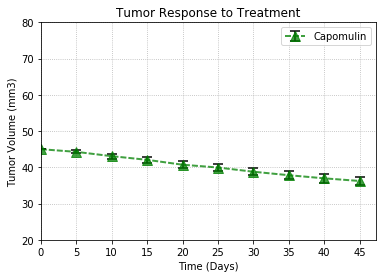

In [67]:
#def a function to make a scatter plot for one of the drugs

def scatterplot(x_data, y_data, error_data, color, marker):
    plt.errorbar(x_data, y_data,yerr = error_data,capsize=5, capthick=2,ecolor='k'
                 , color=colors[color_index],marker=markers[marker_index]
                 ,markersize=10,linestyle='--', dashes=(3, 1),linewidth=2,alpha = 0.75)
                
colors = ['g','r','b','y']
markers=["^","s","d","o"]
color_index = 0
marker_index=0
#xlabel="Time (Days)"
scatterplot(x_data = Comp_mean_Drug_effect.index
            , y_data = Comp_mean_Drug_effect['Capomulin']
          , error_data = Comp_sem_Drug_effect ['Capomulin']
            ,color = colors[color_index], marker=markers[marker_index])  
color_index += 1
marker_index +=1
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")
plt.grid(True, linestyle='dotted')
plt.xticks(range(0,50, 5))
plt.yticks(range(20,90, 10))
plt.xlim(xmin=0)

plt.show()

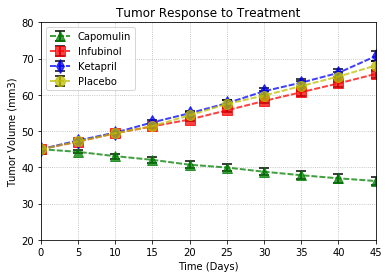

In [442]:
#Make a scatter plot with comparison analysis for ["Capomulin","Infubinol","Ketapril","Placebo" ] 
#based on the function above
colors = ['g','r','b','y']
markers=["^","s","d","o"]
color_index = 0
marker_index=0
for drug in Comp_mean_Drug_effect:
    scatterplot(x_data = Comp_mean_Drug_effect.index, 
                y_data = Comp_mean_Drug_effect[drug], error_data = Comp_sem_Drug_effect[drug],color = colors[color_index],marker=markers[marker_index])
    color_index += 1
    marker_index +=1
    
xmin= Comp_mean_Drug_effect.index.min()
xmax=Comp_mean_Drug_effect.index.max()
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")
plt.grid(True, linestyle='dotted')
plt.xticks(range(0,50, 5))
plt.yticks(range(20,90, 10))
plt.xlim(xmin, xmax)
plt.savefig("Fig1.png")

plt.show() 


In [69]:
#Metastatic Sites Response to Treatment, mean of the Metastatic Sites
Drug_effect_mean= clinical_mouse_merge_df.groupby(["Drug","Timepoint"]).mean()
Metastatic_effect_mean_df=pd.DataFrame(Drug_effect_mean['Metastatic Sites'])
Metastatic_effect_mean_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [70]:
#Metastatic Sites Response, stardard error of the mean of Metastatic Sites
Drug_effect_sem= clinical_mouse_merge_df.groupby(["Drug","Timepoint"]).sem()
Metastatic_effect_sem_df=pd.DataFrame(Drug_effect_sem['Metastatic Sites'])
Metastatic_effect_sem_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [71]:
#Create pivor table of the Metastatic Sites Response to Treatment, mean of the Metastatic Sites
Metastatic_effect_mean_pivot_table=Metastatic_effect_mean_df.pivot_table('Metastatic Sites', ['Timepoint'], 'Drug')
Metastatic_effect_mean_pivot_table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [72]:
#Create pivor table of the  Metastatic Sites to Response Treatment, stardard error of the mean of the Metastatic Sites
Metastatic_effect_sem_pivot_table=Metastatic_effect_sem_df.pivot_table('Metastatic Sites', ['Timepoint'], 'Drug')
Metastatic_effect_sem_pivot_table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [73]:
#Comparison analysis for ["Capomulin","Infubinol","Ketapril","Placebo" ]
#mean
Comp_metastatic_mean_Drug_effect=Metastatic_effect_mean_pivot_table[["Capomulin","Infubinol","Ketapril","Placebo" ]]
#sem
Comp_metastatic_sem_Drug_effect=Metastatic_effect_sem_pivot_table[["Capomulin","Infubinol","Ketapril","Placebo" ]]


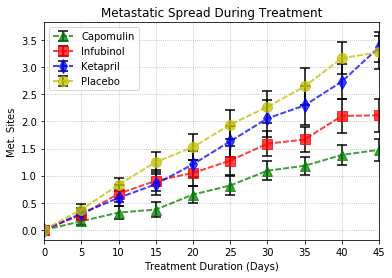

In [452]:
#Make a scatter plot with comparison analysis for ["Capomulin","Infubinol","Ketapril","Placebo" ] 
#based on the function above
colors = ['g','r','b','y']
markers=["^","s","d","o"]
color_index = 0
marker_index=0
for drug in Comp_mean_Drug_effect:
    scatterplot(x_data = Comp_metastatic_mean_Drug_effect.index, 
                y_data = Comp_metastatic_mean_Drug_effect[drug], error_data = Comp_metastatic_sem_Drug_effect [drug]
                ,color = colors[color_index],marker=markers[marker_index])
    color_index += 1
    marker_index +=1
    
xmin= Comp_metastatic_mean_Drug_effect.index.min()
xmax=Comp_metastatic_mean_Drug_effect.index.max()
ymin= pd.to_numeric(Comp_metastatic_mean_Drug_effect.min())
ymax=pd.to_numeric(Comp_metastatic_mean_Drug_effect.max())
#type(xmin)
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.legend(loc="best")
plt.grid(True, linestyle='dotted')
#plt.xticks(range(0,50, 5))
#plt.yticks(range(0.0,4.0,0.5)
plt.xlim(xmin, xmax)
plt.savefig("Fig2.png")
#plt.ylim(ymin, ymax)
plt.show()

In [387]:
#Survival Rate
survival_rate= clinical_mouse_merge_df.groupby(["Drug","Timepoint"]).count()
survival_rate_df=pd.DataFrame(survival_rate['Mouse ID'])
survival_rate_df.head()


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [388]:
#Survival Rate pivot table
survival_rate_df_pivot_table=survival_rate_df.pivot_table('Mouse ID', ['Timepoint'], 'Drug')
survival_rate_df_pivot_table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [389]:
#Number of mice at Timepoint "0" in each drug treatment
mouse_num_0=survival_rate_df_pivot_table.iloc[0,:]
#Pivot Table Percentage of survival rate per drug treatment
percentagem_survival_rate_df_pivot_table=(survival_rate_df_pivot_table/mouse_num_0)*100
#percentagem_survival_rate_df_pivot_table.head()
Comp_perc_survival_rate=percentagem_survival_rate_df_pivot_table[["Capomulin","Infubinol","Ketapril","Placebo" ]]
Comp_perc_survival_rate.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0


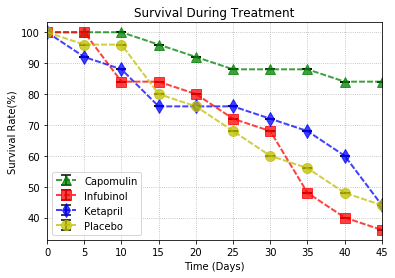

In [453]:
#Make a scatter plot with comparison analysis for ["Capomulin","Infubinol","Ketapril","Placebo" ] 
#based on the function above
colors = ['g','r','b','y']
markers=["^","s","d","o"]
color_index = 0
marker_index=0
for drug in Comp_mean_Drug_effect:
    scatterplot(x_data =Comp_perc_survival_rate.index, 
                y_data = Comp_perc_survival_rate[drug], error_data=0
                ,color = colors[color_index],marker=markers[marker_index])
    color_index += 1
    marker_index +=1
    
xmin= Comp_perc_survival_rate.index.min()
xmax=Comp_perc_survival_rate.index.max()
#ymin= pd.to_numeric(Comp_metastatic_mean_Drug_effect.min())
#ymax=pd.to_numeric(Comp_metastatic_mean_Drug_effect.max())
#type(xmin)
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate(%)")
plt.legend(loc="best")
plt.grid(True, linestyle='dotted')
#plt.xticks(range(0,50, 5))
#plt.yticks(range(0.0,4.0,0.5)
plt.xlim(xmin, xmax)
#plt.ylim(ymin, ymax)
plt.savefig("Fig3.png")
plt.show()

In [391]:
#Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.
Comp_mean_Drug_effect.set_index
#Tumor size at Timepoint = 0
tumor_size_timepoint_0=Comp_mean_Drug_effect.iloc[0,:]
#tumor_size_timepoint_45=Comp_mean_Drug_effect.loc[["45"],["Placebo"]]
tumor_size_timepoint_45=Comp_mean_Drug_effect.iloc[-1,:]

In [392]:
variation_tumor_size_0_to_45=100*((tumor_size_timepoint_45/tumor_size_timepoint_0)-(tumor_size_timepoint_0/tumor_size_timepoint_0))
variation_tumor_size_0_to_45

Drug
Capomulin   -19.481481
Infubinol    46.123457
Ketapril     57.050505
Placebo      51.272727
dtype: float64

In [456]:
x = variation_tumor_size_0_to_45.index
y = variation_tumor_size_0_to_45[x]
colors = []
for y in variation_tumor_size_0_to_45[x]:
    if y < 0:
        colors.append('g')
    else:
        colors.append('r')
colors

['g', 'r', 'r', 'r']

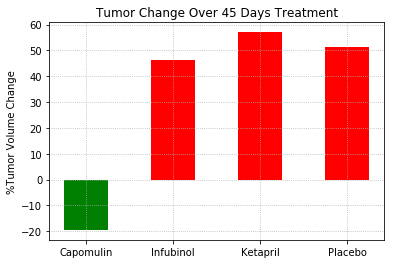

In [458]:
plt.bar(x, variation_tumor_size_0_to_45, color=colors, align="center", width=0.5)
plt.grid(True, linestyle='dotted')
plt.title("Tumor Change Over 45 Days Treatment")
plt.ylabel("%Tumor Volume Change")


plt.savefig("Fig4.png")
plt.show()

In [451]:
#Have no idea how to add the percentages to the plot, have to ask!

